# Introduction  
### Clinical Study prediction
Lets have another example of Story telling with data and ML model to predictions based on a clinical study for further subject study.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
attention = sns.load_dataset("attention")

In [ ]:
attention.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [ ]:
attention.describe()

,Unnamed: 0,subject,solutions,score
count,60.000000,60.000000,60.000000,60.000000
mean,29.500000,10.500000,2.000000,5.958333
std,17.464249,5.814943,0.823387,1.621601
min,0.000000,1.000000,1.000000,2.000000
25%,14.750000,5.750000,1.000000,5.000000
50%,29.500000,10.500000,2.000000,6.000000
75%,44.250000,15.250000,3.000000,7.000000
max,59.000000,20.000000,3.000000,9.000000


In [ ]:
attention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   subject     60 non-null     int64  
 2   attention   60 non-null     object 
 3   solutions   60 non-null     int64  
 4   score       60 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


#### Visualisation and Story Telling

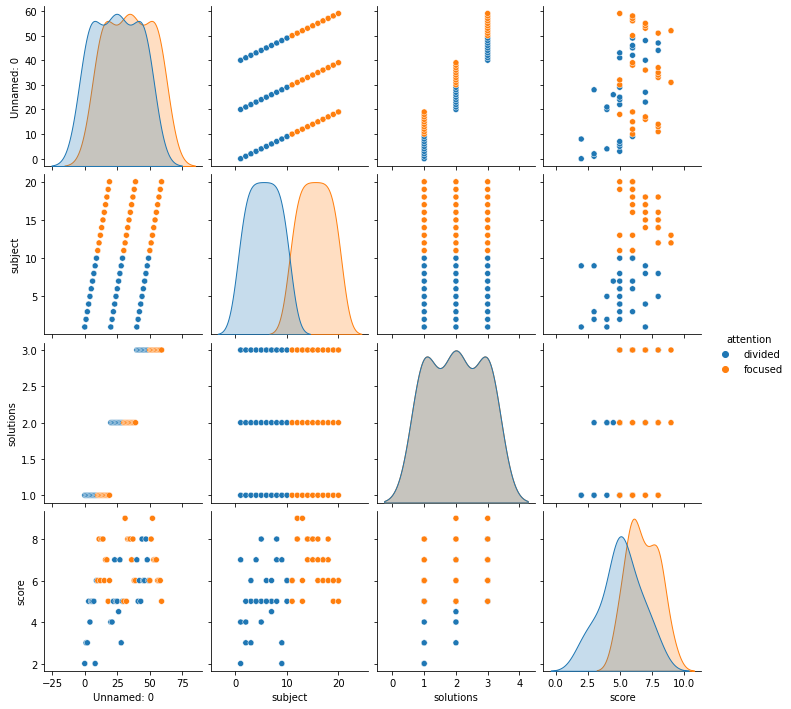

In [ ]:
sns.pairplot(attention, hue='attention')

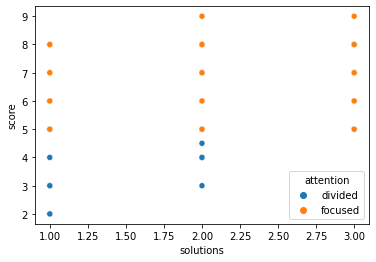

In [ ]:
sns.scatterplot(data=attention, x='solutions', y='score', hue='attention')

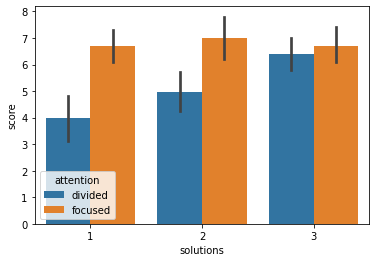

In [ ]:
sns.barplot(data=attention, x='solutions',y='score',hue='attention')

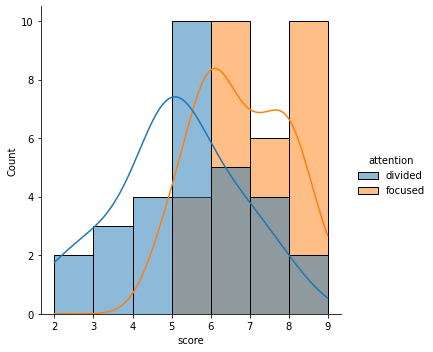

In [ ]:
sns.displot(data=attention, x=attention['score'], kde=True, hue="attention")

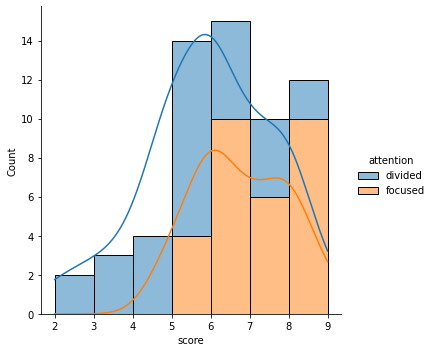

In [ ]:
sns.displot(data=attention, x=attention['score'], kde=True, hue="attention", multiple="stack")

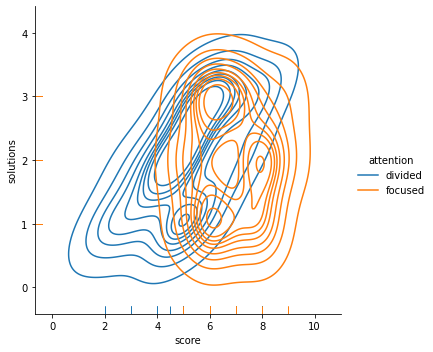

In [ ]:
sns.displot(data=attention, x='score', y='solutions', kind='kde', hue="attention", rug=True)

In [ ]:
sns.displot(data=attention, x=attention['score'], kind='kde', hue="attention")

## Machine Learning Algorithm selection Route Map  
Dimension Reduction (NO) --> Is Data Labelled (YES) --> Predicting Numeric value? (NO) --> Speed or Accuracy (SPEED) --> Data Explainable (YES) --> DECISION TREES or LOGISTIC REGRESSION

### Test Train Split of Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(attention.drop(['subject', 'attention','Unnamed: 0'], axis=1), attention['attention'], test_size=0.15, random_state=76)

In [ ]:
x_train

,solutions,score
23,2,7.0
32,2,5.0
38,2,6.0
14,1,8.0
27,2,7.0
39,2,6.0
37,2,8.0
30,2,5.0
36,2,7.0
29,2,5.0


In [ ]:
y_train

23    divided
32    focused
38    focused
14    focused
27    divided
39    focused
37    focused
30    focused
36    focused
29    divided
31    focused
3     divided
10    focused
46    divided
51    focused
6     divided
50    focused
16    focused
22    divided
45    divided
49    divided
11    focused
47    divided
21    divided
12    focused
4     divided
2     divided
13    focused
58    focused
19    focused
17    focused
20    divided
53    focused
35    focused
5     divided
8     divided
28    divided
18    focused
52    focused
57    focused
44    divided
40    divided
34    focused
15    focused
1     divided
42    divided
26    divided
0     divided
7     divided
55    focused
33    focused
Name: attention, dtype: object

### Applying Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array(['focused', 'divided', 'focused', 'divided', 'divided', 'focused',
       'divided', 'divided', 'divided'], dtype=object)

#### Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_mtx = confusion_matrix(y_test, predictions)
conf_mtx

array([[4, 2],
       [2, 1]])

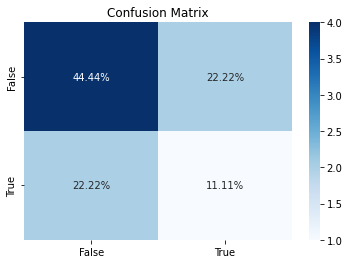

In [ ]:
labels = ["{0:.2%}".format(value) for value in conf_mtx.flatten()/np.sum(conf_mtx)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mtx, annot=labels, fmt='', cmap='Blues')

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     divided       0.67      0.67      0.67         6
     focused       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.56      0.56      0.56         9



### Visualising the Decision Tree Model created

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [ ]:
features = list(attention.columns[3:])
features

['solutions', 'score']

Template

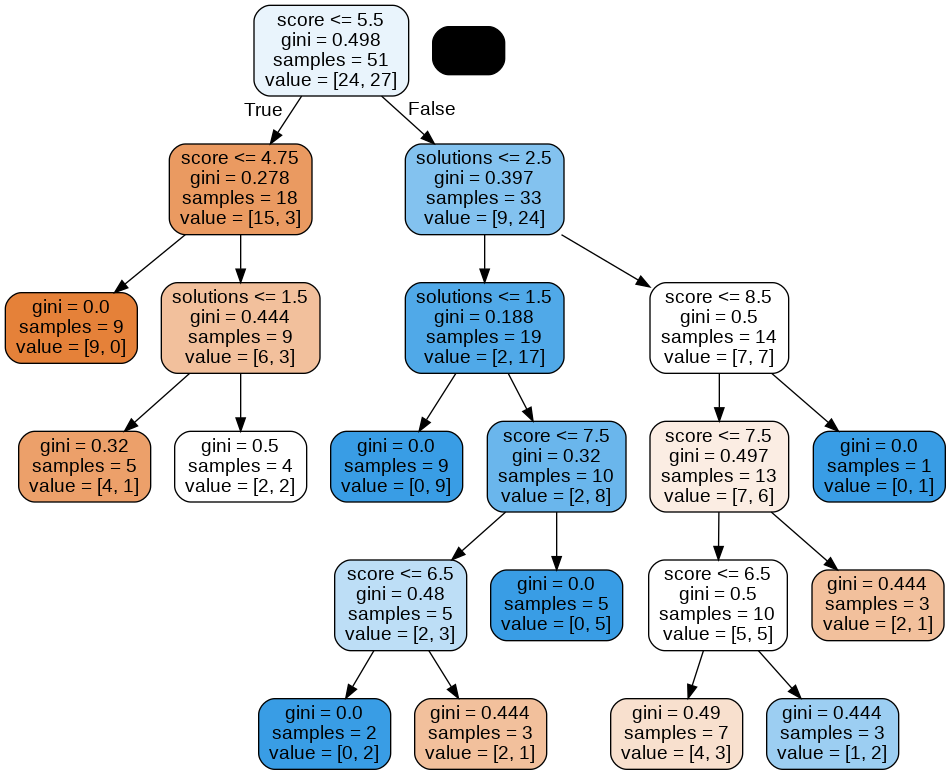

In [ ]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

### HyperParameter Tuning of Decision Tree

In [ ]:
model_1= DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=3)

In [ ]:
model_1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=4)

In [ ]:
predictions_1 = model_1.predict(x_test)
predictions_1

array(['focused', 'divided', 'focused', 'divided', 'divided', 'focused',
       'divided', 'divided', 'divided'], dtype=object)

#### Model Evaluation

In [ ]:
conf_mtx_1 = confusion_matrix(y_test, predictions_1)
conf_mtx_1

array([[4, 2],
       [2, 1]])

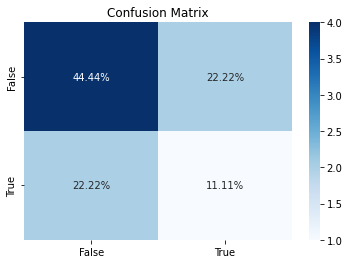

In [ ]:
labels = ["{0:.2%}".format(value) for value in conf_mtx_1.flatten()/np.sum(conf_mtx_1)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mtx_1, annot=labels, fmt='', cmap='Blues')

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

     divided       0.67      0.67      0.67         6
     focused       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.56      0.56      0.56         9



Visualisating new model again

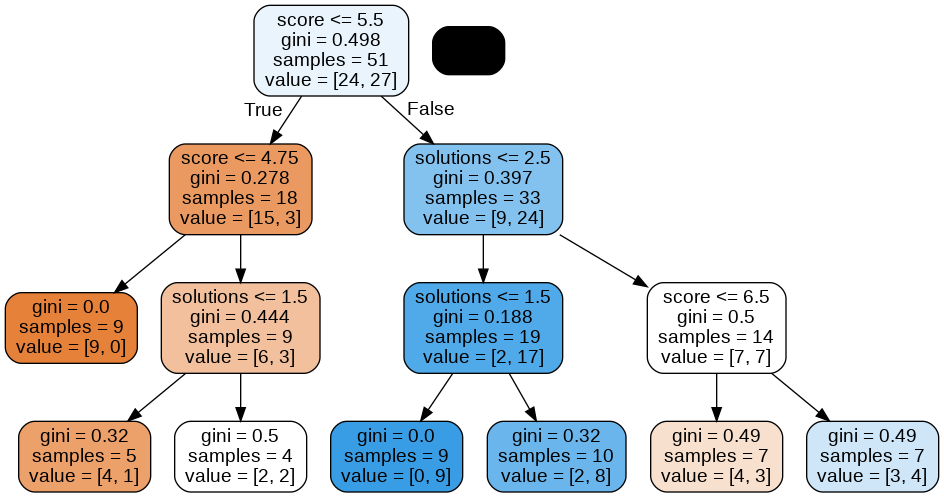

In [ ]:
dot_data = StringIO()  
export_graphviz(model_1, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

### Appplying Logistic Regression algorithm

Now we switch to Logistic Regression and try to compare the results

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_2 = LogisticRegression()

In [ ]:
model_2.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions_2 = model_2.predict(x_test)
predictions_2

array(['focused', 'divided', 'focused', 'divided', 'divided', 'focused',
       'divided', 'divided', 'divided'], dtype=object)

#### Model evaluation

In [ ]:
conf_mtx_2 = confusion_matrix(y_test, predictions_2)
conf_mtx_2

array([[4, 2],
       [2, 1]])

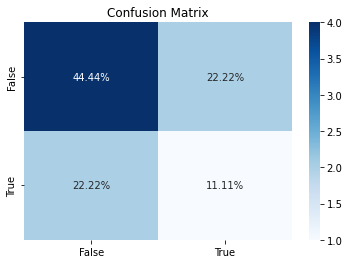

In [ ]:
labels = ["{0:.2%}".format(value) for value in conf_mtx_2.flatten()/np.sum(conf_mtx_2)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mtx_2, annot=labels, fmt='', cmap='Blues')

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

     divided       0.67      0.67      0.67         6
     focused       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.56      0.56      0.56         9

